In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn import svm


In [3]:
data=pd.read_csv("C:/Users/Mohammed/Desktop/Heart.csv")
data.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
print(data.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
target        0
dtype: int64


In [6]:
print(data.isnull().values.any())

True


In [7]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
target         object
dtype: object

In [8]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,ChestPain,Thal,target
0,typical,fixed,No
1,asymptomatic,normal,Yes
2,asymptomatic,reversable,Yes
3,nonanginal,normal,No
4,nontypical,normal,No


In [9]:
obj_df["Thal"] = obj_df["Thal"].astype('category')
obj_df["thal"] = obj_df["Thal"].cat.codes
obj_df.head()

,ChestPain,Thal,target,thal
0,typical,fixed,No,0
1,asymptomatic,normal,Yes,1
2,asymptomatic,reversable,Yes,2
3,nonanginal,normal,No,1
4,nontypical,normal,No,1


In [10]:
data["Thal"] = data["Thal"].astype('category')
data["Thal"] = data["Thal"].cat.codes
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,1,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,1,No


In [11]:
data["target"] = data["target"].astype('category')
data["target"] = data["target"].cat.codes
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,1,0


In [12]:
data["ChestPain"] = data["ChestPain"].astype('category')
data["ChestPain"] = data["ChestPain"].cat.codes
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [13]:

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [14]:
median = data['Ca'].median()
data['Ca'].fillna(median, inplace=True)

In [15]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [16]:
print(data.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
target        0
dtype: int64


In [18]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain        int8
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal             int8
target           int8
dtype: object

In [19]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [20]:
data.drop(["Unnamed: 0"],axis=1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [21]:
data=data.drop(["Unnamed: 0"],axis=1)
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [22]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


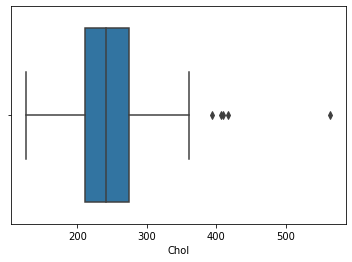

In [23]:
import seaborn as sns
sns.boxplot(x=data['Chol'])

In [24]:
data.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,1.313531,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.612277,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


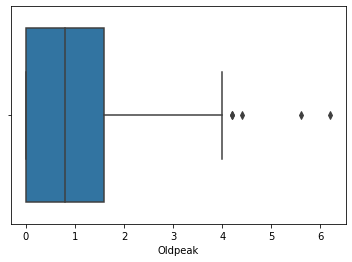

In [25]:
import seaborn as sns
sns.boxplot(x=data['Oldpeak'])

C:\Users\Mohammed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mohammed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


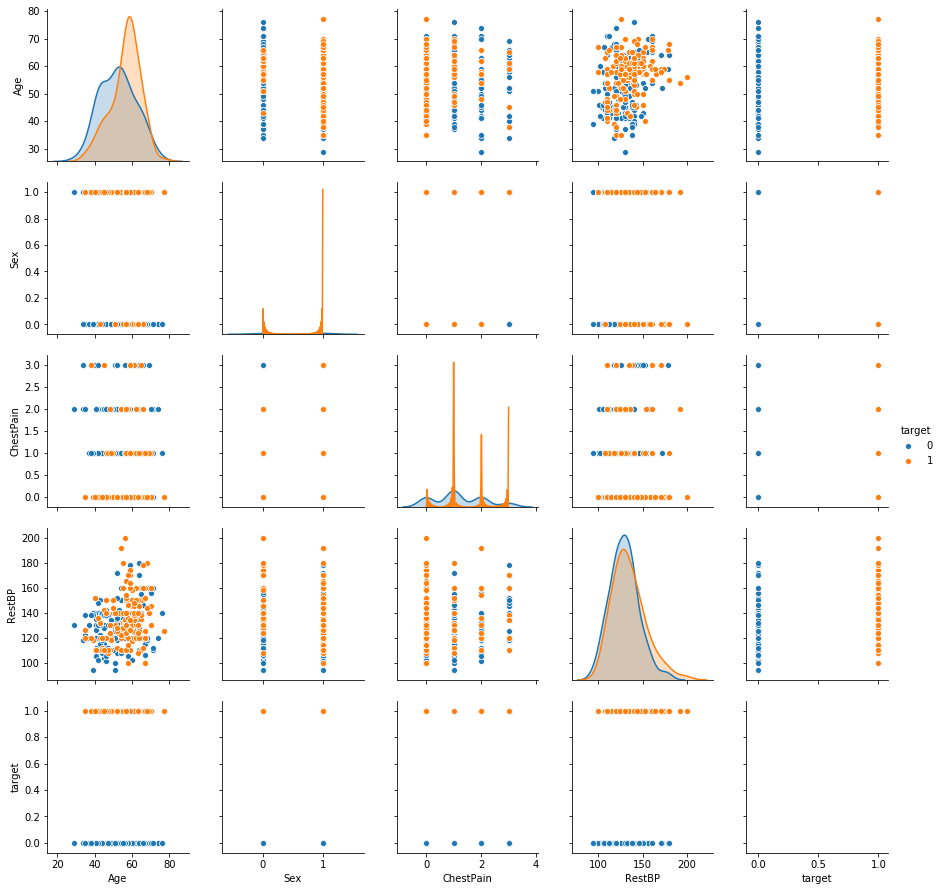

In [26]:
import seaborn as sns

sns.pairplot(data=data[['Age','Sex','ChestPain','RestBP','target']],hue='target')

In [27]:
data_list = []
for row in range(0, 20):
    data_list.append([str(data.values[row,column]) for column in range(0, 13)])


In [26]:
association_rules = apriori(data_list, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
for i in range(0,3):
    print(f"Required Association No. {i+1} is: {association_results[i]}")
    print('-'*25)

NameError: name 'apriori' is not defined

In [28]:
print("hi")
train=data.drop('target',axis=1)
target=data.target
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.1,random_state=109)
print("X train size =",x_train.shape)
print("X test size =",x_test.shape)
print("Y train size =",y_train.shape)
print("Y test size =",y_test.shape)
X_train=train
Y_train=target

hi
X train size = (272, 13)
X test size = (31, 13)
Y train size = (272,)
Y test size = (31,)


In [29]:
print(x_train)

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
76    60    1          0     125   258    0        2    141      1      2.8   
275   64    1          3     170   227    0        2    155      0      0.6   
298   45    1          3     110   264    0        0    132      0      1.2   
83    68    1          1     180   274    1        2    150      1      1.6   
232   49    1          1     118   149    0        2    126      0      0.8   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
75    65    0          1     160   360    0        2    151      0      0.8   
141   59    1          3     170   288    0        2    159      0      0.2   
301   57    0          2     130   236    0        2    174      0      0.0   
245   67    1          0     120   237    0        0     71      0      1.0   
262   60    0          3     150   240    0        0    171      0      0.9   

     Slope   Ca  Thal  
76       2  1.0     2  
275

In [30]:
cl=svm.SVC(kernel='linear') #Creating the svm classifier
cl.fit(x_train,y_train)#Training the model with the help of training sets
y_pred=cl.predict(x_test)#Prediciton of the test data set

In [31]:
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))

Accuracy= 0.8709677419354839
Precision= 0.8333333333333334


In [32]:
d=dict()
d['Age']=[63]
d['Sex']=[1]
d['ChestPain']=[3]
d['RestBP']=[145]
d['Chol']=[233]
d['Fbs']=[1]
d['RestECG']=[2]
d['MaxHR']=[150]
d['ExAng']=[0]
d['Oldpeak']=[2.3]
d['Slope']=[3]
d['Ca']=[0.0]
d['Thal']=[0]
t=pd.DataFrame(d)
y_pred=cl.predict(t)
print(y_pred)


[0]
